In [4]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model


In [5]:

def create_cnn_model():
    input_shape = (32, 32, 1)

    # Define the model input
    inputs = tf.keras.layers.Input(shape=input_shape)

    # Convolutional layers
    x = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = tf.keras.layers.Conv2D(128, kernel_size=(3, 3), activation='relu')(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten the convolutional layers
    x = tf.keras.layers.Flatten()(x)

    # Dense layers
    x = tf.keras.layers.Dense(256, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x)

    outputs = tf.keras.layers.Dense(20, activation='softmax')(x)

    # Create the model
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    return model


model = create_cnn_model()


In [6]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [7]:

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/train',
    labels='inferred',
    label_mode='int',
    image_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'dataset/test',
    labels='inferred',
    label_mode='int',
    image_size=(32, 32),
    color_mode='grayscale',
    batch_size=32,
    shuffle=False
)


train_dataset = train_dataset.map(lambda x, y: (tf.where(tf.cast(x > 0, tf.bool), tf.cast(255, tf.float32), x), y))
test_dataset = test_dataset.map(lambda x, y: (tf.where(tf.cast(x > 0, tf.bool), tf.cast(255, tf.float32), x), y))

# Normalize the pixel values
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(scale=1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
test_dataset = test_dataset.map(lambda x, y: (normalization_layer(x), y))


Found 27459 files belonging to 20 classes.
Found 4860 files belonging to 20 classes.


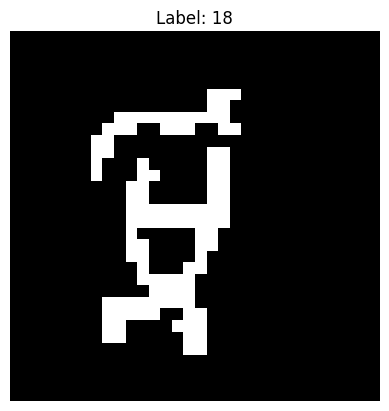

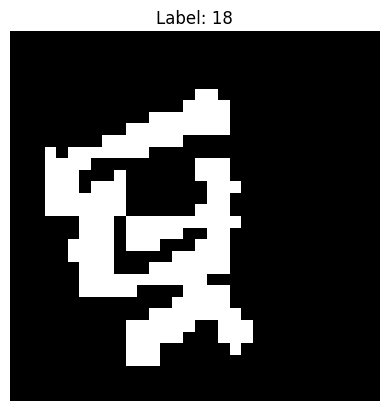

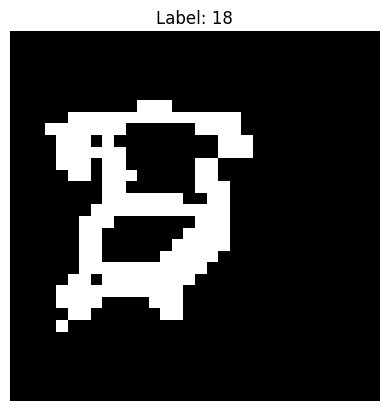

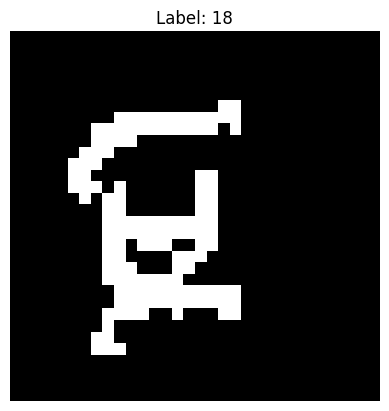

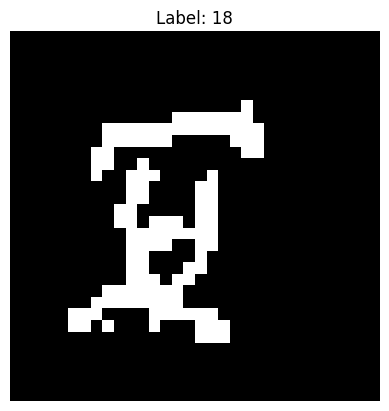

In [8]:
# just to show what the images look like
import matplotlib.pyplot as plt


chosen_label = 18

for images, labels in train_dataset:
    for image, label in zip(images, labels):
        if label == chosen_label:
            image = image.numpy().astype("uint8")

            plt.imshow(image, cmap="gray")
            plt.title(f"Label: {label}")
            plt.axis("off")
            plt.show()
    break

In [9]:
# Train the model
history = model.fit(train_dataset, validation_data=test_dataset, epochs=25)

Epoch 1/25
859/859 [==============================] - 29s 19ms/step - loss: 0.9539 - accuracy: 0.6912 - val_loss: 0.2538 - val_accuracy: 0.9191
Epoch 2/25
859/859 [==============================] - 16s 19ms/step - loss: 0.2772 - accuracy: 0.9051 - val_loss: 0.1077 - val_accuracy: 0.9640
Epoch 3/25
859/859 [==============================] - 24s 28ms/step - loss: 0.1585 - accuracy: 0.9468 - val_loss: 0.0909 - val_accuracy: 0.9704
Epoch 4/25
859/859 [==============================] - 15s 17ms/step - loss: 0.1101 - accuracy: 0.9626 - val_loss: 0.0639 - val_accuracy: 0.9796
Epoch 5/25
859/859 [==============================] - 15s 17ms/step - loss: 0.0829 - accuracy: 0.9722 - val_loss: 0.0525 - val_accuracy: 0.9815
Epoch 6/25
859/859 [==============================] - 15s 17ms/step - loss: 0.0709 - accuracy: 0.9753 - val_loss: 0.0592 - val_accuracy: 0.9802
Epoch 7/25
859/859 [==============================] - 15s 17ms/step - loss: 0.0617 - accuracy: 0.9786 - val_loss: 0.0604 - val_accuracy:

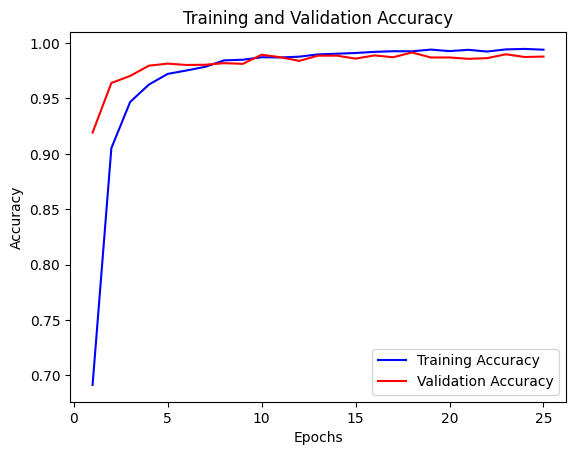

In [10]:
import matplotlib.pyplot as plt


# Access the training and validation accuracy from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the training and validation accuracy
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

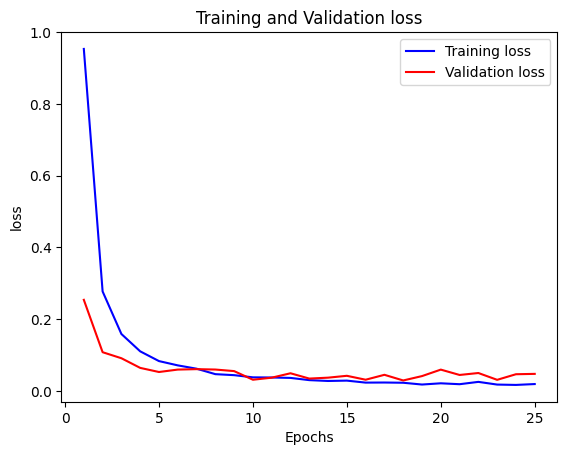

In [11]:
train_acc = history.history['loss']
val_acc = history.history['val_loss']

# Plot the training and validation loss
epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b', label='Training loss')
plt.plot(epochs, val_acc, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [11]:
model.save("model.h5")